# **PR√ÅCTICA 2: MODELOS CONEXIONISTAS - Algoritmo LMS y variantes. Estructuras.**
### Universitat de Val√®ncia, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3¬™ curso del Grado Ciencia de Datos

#### 1 Estructuras adaptativas: Estructura directa.   
En este apartado vamos a implementar una estructura directa que nos va a permitir analizar el LMS b√°sico junto con sus variantes. La estructura directa viene dada por la siguiente figura, donde el sistema desconocido es un filtro FIR:


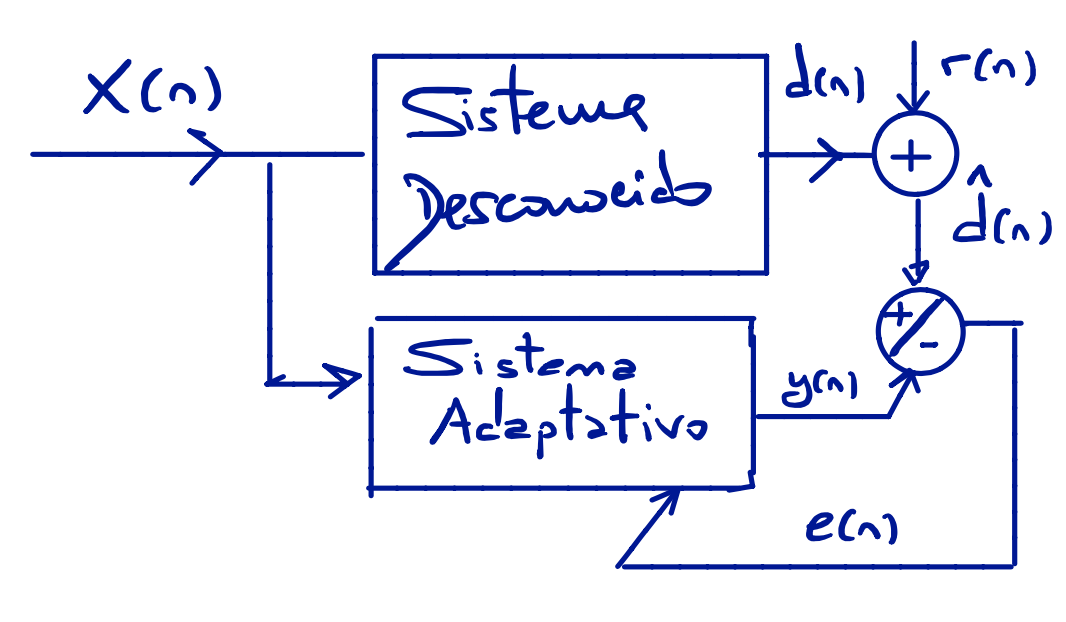


La entrada $x[n]$ ser√° una se√±al gaussiana de media cero y varianza unidad, de tantas muestras como iteraciones a realizar, y $r[n]$ es ruido gaussiano que se le puede sumar a la salida del sistema desconocido (su varianza es una variable que se solicita).

**Algoritmo**

Tenemos un filtro adaptativo de respuesta impulsional $‚Ñé_ùëé[ùëõ]$, de $ùêø_ùëé$ coeficientes, cuya se√±al de salida $ùë¶_ùëé[ùëõ]$ se calcula a partir de $ùêø_ùëé$ muestras previas de $ùë•[ùëõ]$ como:   

$$ùë¶_ùëé[ùëõ] = ‚Ñé_ùëé[0]‚ãÖùë•[ùëõ] + ‚Ñé_ùëé[1]‚ãÖùë•[ùëõ‚àí1] + ‚Ñé_ùëé[2]‚ãÖùë•[ùëõ‚àí2] +...+ ‚Ñé_ùëé[ùêø_ùëé‚àí1]‚ãÖùë•[ùëõ‚àíùêø_ùëé+1]$$   


Notar que x est√° girado (numpy.flip()) al multiplicar a los coeficientes, y que necesitamos crear $ùêø_ùëé‚àí1$ muestras adicionales de x para empezar a predecir (adem√°s de la muestra que nos llega en ùëõ=0, en total $ùêø_ùëé$). Para la salida del filtro desconocido de longitud $ùêø_ùëë$:


$$ùë¶_ùëë[ùëõ] = ‚Ñé_ùëë[0]‚ãÖùë•[ùëõ] + ‚Ñé_ùëë[1]‚ãÖùë•[ùëõ‚àí1] + ‚Ñé_ùëë[2]‚ãÖùë•[ùëõ‚àí2] +...+ ‚Ñé_ùëë[ùêø_ùëë‚àí1]‚ãÖùë•[ùëõ‚àíùêø_ùëë+1]$$


En este caso necesitamos $ùêø_ùëë‚àí1$ muestras adicionales de x, m√°s la que est√° en ùëõ =0, para empezar a predecir.   

- A la salida del sistema desconocido se a√±ade ruido: $ùë¶‚Ä≤_ùëë[ùëõ] = ùë¶_ùëë[ùëõ] + ùëü[ùëõ]$ 

- La se√±al de error $ùëí[ùëõ]$ se calcula como: $ùëí[ùëõ] = ùë¶‚Ä≤_ùëë[ùëõ] ‚àí ùë¶_ùëé[ùëõ]$

A continuaci√≥n se actualizan los coeficientes del filtro (algoritmo LMS): 


$$‚Ñé_ùëé[ùëò] = ‚Ñé_ùëé[ùëò] + ùúá ‚ãÖ ùëí[ùëõ] ‚ãÖ ùë•[ùëõ‚àíùëò], ùëò = 0, 1, ..., ùêø_ùëé‚àí1$$

donde ùúá es la constante de adaptaci√≥n que controla la velocidad de convergencia. El proceso completo puede repetirse varias veces y obtener varios $‚Ñé_ùëé$ que se pueden promediar para obtener una mejor estimaci√≥n.   

Implementa dicha estructura (usando la librer√≠a numpy). El programa desarrollado deber√≠a solicitar lo siguiente:   

1. Respuesta impulsional del sistema desconocido ($h[n]$)
2. Longitud del sistema adaptativo ($L_a$). Por defecto 20.
3. N√∫mero de iteraciones N = n¬∫ de muestras de $x[n]$. Por defecto 1000.
4. Varianza del ruido r(n). Por defecto 0.01
5. Constante de adaptaci√≥n. Por defecto 0.01.
6. N√∫mero de promediados. Por defecto 100.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [ ]:
def LMS(La, Ld, n_iter, var, nu, n_prome):
    """
    # Longitud del sistema adaptativo (ùêøùëé)
    # Longitud del sistema adaptativo (ùêød)
    # N√∫mero de iteraciones N = n¬∫ de muestras de  ùë•[ùëõ] (n_iter)
    # Varianza del ruido r(n) (var)
    # Constante de adaptaci√≥n. (nu)
    # N√∫mero de promediados (n_prome)
    # Sistema desconocido de prueba (self.h_d)
    """

    lista_actualizaciones = []
    lista_medias = []
    promedio = []
    lista_errores = []
    h_d = 0.1 * np.random.randn(Ld)

    for a in range (n_prome):
        salida = [] # para quedarnos con las √∫ltimas iteraciones
        h_a = np.random.randn(La)
        ruido = np.random.normal(loc = 0, scale = np.sqrt(var), size = n_iter)
        
        if La == Ld: 
            Xd  = np.random.normal(loc = 0, scale = 1, size = n_iter + max(Ld,La)-1)
            Xa  = Xd    
        else: 
            if (La > Ld):
                Xa = np.random.normal(loc = 0, scale = 1, size = n_iter + La-1)
                Xd = Xa[La-Ld:]
            else:
                Xd = np.random.normal(loc = 0, scale = 1, size = n_iter + Ld-1)
                Xa = Xd[Ld-La:]
            
        for i in range (n_iter):
            
            # Salida sistema adaptativo
            ya = np.dot(h_a, np.flip(Xa[i:La+i]))
            # Salida sistema desconocido 
            yd = np.dot(h_d, np.flip(Xd[i:Ld+i])) + ruido[i]
            # Calculamos el error
            error = (yd-ya)
            # Guardamos el error
            salida.append((error)**2)
            # Actualizar los coeficientes del filtro
            h_a = h_a + nu * error * np.flip(Xa[i:La+i])
        
        # Guardamos las actualizaciones
        lista_actualizaciones.append(h_a)
        
        promedio.append(salida)
    # Media del ha promedio, para dar una estimaci√≥n m√°s robusta de los 
    # coeficientes del filtro deconocido
    media = np.mean(lista_actualizaciones, axis= 0)
    lista_errores = np.mean(np.array(promedio),axis=0)
    
    return media, h_d, lista_errores             

In [ ]:
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)

In [ ]:
media

array([ 0.01034678,  0.03486341, -0.01532568,  0.19713657, -0.19626528,
       -0.00345873,  0.03903304,  0.06189664, -0.01075071, -0.01040872,
        0.07694124,  0.14030025,  0.04467027, -0.23775721,  0.04136297,
        0.07151701, -0.02391442, -0.03531814, -0.26612627, -0.11180977])

In [ ]:
h_d

array([ 0.01036035,  0.03517557, -0.01631578,  0.1962672 , -0.19748021,
       -0.00312101,  0.03843981,  0.06108402, -0.01054426, -0.01172146,
        0.07568184,  0.1403462 ,  0.04639062, -0.23692312,  0.04109194,
        0.07000884, -0.0240272 , -0.0350263 , -0.26700674, -0.11224118])

**Aplicaci√≥n**   

La salida a mostrar en todos los casos que vienen a continuaci√≥n es el $e_2(k)$, en escala lineal y semilogar√≠tmica (semilogy).

Utiliza el siguiente sistema desconocido de prueba: h = 0.1\*np.random.randn($L_d$) donde $L_d$ es la longitud de h (por ejemplo $L_d=20$). Con este sistema determina las siguientes pruebas con las siguientes condiciones considerando la presencia de ruido y su ausencia (var√≠a su varianza entre 0 y 1 para ver c√≥mo impacta su presencia). Comprueba si, al final de la convergencia, el sistema adaptativo modeliza el sistema desconocido  

‚Ä¢ **Considera que la longitud del sistema desconocido es igual, mayor o menor que la del sistema adaptativo; ¬øqu√© ocurre?**

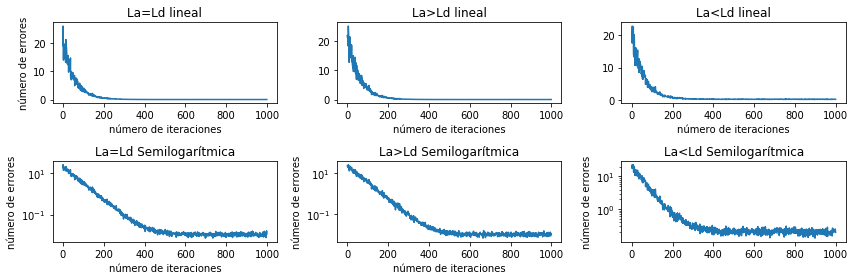

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La=Ld)
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,0].plot(lista_errores)
axes[0,0].set_title("La=Ld lineal")
axes[0,0].set_ylabel("n√∫mero de errores")
axes[0,0].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,0].semilogy(lista_errores)
axes[1,0].set_title("La=Ld Semilogar√≠tmica")
axes[1,0].set_ylabel("n√∫mero de errores")
axes[1,0].set_xlabel("n√∫mero de iteraciones")

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La>Ld)
media, h_d, lista_errores = LMS(La = 20, Ld = 10, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,1].plot(lista_errores)
axes[0,1].set_title("La>Ld lineal")
axes[0,1].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,1].semilogy(lista_errores)
axes[1,1].set_title("La>Ld Semilogar√≠tmica")
axes[1,1].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La<Ld)
media, h_d, lista_errores = LMS(La = 20, Ld = 40, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,2].plot(lista_errores)
axes[0,2].set_title("La<Ld lineal")
axes[0,2].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,2].semilogy(lista_errores)
axes[1,2].set_title("La<Ld Semilogar√≠tmica")
axes[1,2].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

plt.tight_layout()
plt.show()

### Respuesta

Si queremos identificar un sistema desconocido h[n] de longitud Ld con un filtro adaptativo de longitud La. Se debe cmplir que La>= para obtener un resultado adecuado, descartando los coeficientes nulos de la h[n] estimada m√°s a la derecha. 

Como podemos ver en las gr√°ficas cuando tenemos que La=Ld, tenemos mayor n√∫mero de errores. Cunado La>Ld es el caso perfecto. mientras que La<Ld nos errores no convergen de la misma manera.

‚Ä¢ **Var√≠a la constante de adaptaci√≥n y comprueba lo que ocurre.**   

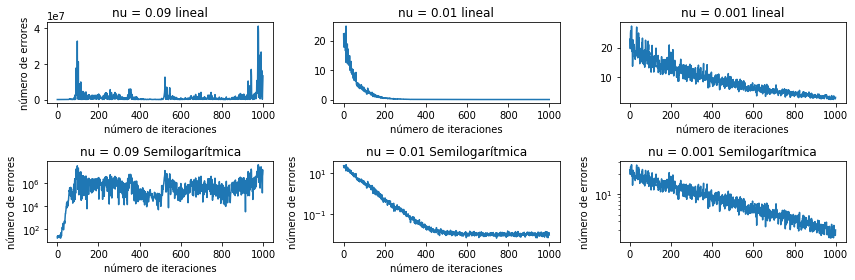

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La=Ld)
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.09, n_prome = 100)
axes[0,0].plot(lista_errores)
axes[0,0].set_title("nu = 0.09 lineal")
axes[0,0].set_ylabel("n√∫mero de errores")
axes[0,0].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,0].semilogy(lista_errores)
axes[1,0].set_title("nu = 0.09 Semilogar√≠tmica")
axes[1,0].set_ylabel("n√∫mero de errores")
axes[1,0].set_xlabel("n√∫mero de iteraciones")

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La>Ld)
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,1].plot(lista_errores)
axes[0,1].set_title("nu = 0.01 lineal")
axes[0,1].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,1].semilogy(lista_errores)
axes[1,1].set_title("nu = 0.01 Semilogar√≠tmica")
axes[1,1].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La<Ld)
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.001, n_prome = 100)
axes[0,2].plot(lista_errores)
axes[0,2].set_title("nu = 0.001 lineal")
axes[0,2].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,2].semilogy(lista_errores)
axes[1,2].set_title("nu = 0.001 Semilogar√≠tmica")
axes[1,2].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

plt.tight_layout()
plt.show()

### Respuesta

Como podemos ver la constatne de adaptaci√≥n es un par√°metro importante para conseguir un funcionamiento √≥ptimo del sistema.

- Si la constante de adaptaci√≥n toma valores altos, como podemos ver en la gr√°fica, los valores no logran una buena aproximaci√≥n de los coeficientes del filtro desconocido. Estos tienen mayor n√∫mero de error. 

- Si la constante de adaptaci√≥n toma valores menores, como podemos ver en la gr√°fica, los valores logran una aproximaci√≥n m√°s exacta a los coeficientes del filtro desconocido pero requieren mayor n√∫mero de iteraciones.

‚Ä¢ **Implementa las variantes con signo; ¬øc√≥mo es su convergencia en relaci√≥n al LMS b√°sico?**  

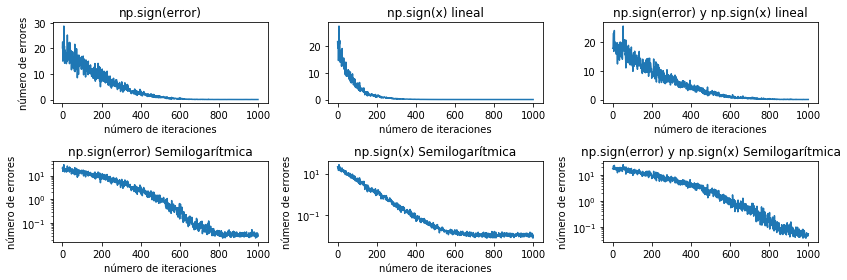

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))
def LMS(La, Ld, n_iter, var, nu, n_prome):
    lista_actualizaciones = []
    lista_medias = []
    promedio = []
    lista_errores = []
    h_d = 0.1 * np.random.randn(Ld)
    for a in range (n_prome):
        salida = [] # para quedarnos con las √∫ltimas iteraciones
        h_a = np.random.randn(La)
        ruido = np.random.normal(loc = 0, scale = np.sqrt(var), size = n_iter)       
        if La == Ld: 
            Xd  = np.random.normal(loc = 0, scale = 1, size = n_iter + max(Ld,La)-1)
            Xa  = Xd    
        else: 
            if (La > Ld):
                Xa = np.random.normal(loc = 0, scale = 1, size = n_iter + La-1)
                Xd = Xa[La-Ld:]
            else:
                Xd = np.random.normal(loc = 0, scale = 1, size = n_iter + Ld-1)
                Xa = Xd[Ld-La:]           
        for i in range (n_iter):           
            # Salida sistema adaptativo
            ya = np.dot(h_a, np.flip(Xa[i:La+i]))
            # Salida sistema desconocido 
            yd = np.dot(h_d, np.flip(Xd[i:Ld+i])) + ruido[i]
            # Calculamos el error
            error = (yd-ya)
            # Guardamos el error
            salida.append((error)**2)
            # Actualizar los coeficientes del filtro
            h_a = h_a + nu * np.sign(error) * np.flip(Xa[i:La+i])
        # Guardamos las actualizaciones
        lista_actualizaciones.append(h_a)
        promedio.append(salida)
    # Media del ha promedio, para dar una estimaci√≥n m√°s robusta de los 
    # coeficientes del filtro deconocido
    media = np.mean(lista_actualizaciones, axis= 0)
    lista_errores = np.mean(np.array(promedio),axis=0)
    return media, h_d, lista_errores    
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,0].plot(lista_errores)
axes[0,0].set_title("np.sign(error)")
axes[0,0].set_ylabel("n√∫mero de errores")
axes[0,0].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,0].semilogy(lista_errores)
axes[1,0].set_title("np.sign(error) Semilogar√≠tmica")
axes[1,0].set_ylabel("n√∫mero de errores")
axes[1,0].set_xlabel("n√∫mero de iteraciones")

# Graficamos el n√∫mero de errores en cada iteraci√≥n (La>Ld)
def LMS(La, Ld, n_iter, var, nu, n_prome):
    lista_actualizaciones = []
    lista_medias = []
    promedio = []
    lista_errores = []
    h_d = 0.1 * np.random.randn(Ld)
    for a in range (n_prome):
        salida = [] # para quedarnos con las √∫ltimas iteraciones
        h_a = np.random.randn(La)
        ruido = np.random.normal(loc = 0, scale = np.sqrt(var), size = n_iter)       
        if La == Ld: 
            Xd  = np.random.normal(loc = 0, scale = 1, size = n_iter + max(Ld,La)-1)
            Xa  = Xd    
        else: 
            if (La > Ld):
                Xa = np.random.normal(loc = 0, scale = 1, size = n_iter + La-1)
                Xd = Xa[La-Ld:]
            else:
                Xd = np.random.normal(loc = 0, scale = 1, size = n_iter + Ld-1)
                Xa = Xd[Ld-La:]           
        for i in range (n_iter):           
            # Salida sistema adaptativo
            ya = np.dot(h_a, np.flip(Xa[i:La+i]))
            # Salida sistema desconocido 
            yd = np.dot(h_d, np.flip(Xd[i:Ld+i])) + ruido[i]
            # Calculamos el error
            error = (yd-ya)
            # Guardamos el error
            salida.append((error)**2)
            # Actualizar los coeficientes del filtro
            h_a = h_a + nu * error * np.sign(np.flip(Xa[i:La+i]))
        # Guardamos las actualizaciones
        lista_actualizaciones.append(h_a)
        promedio.append(salida)
    # Media del ha promedio, para dar una estimaci√≥n m√°s robusta de los 
    # coeficientes del filtro deconocido
    media = np.mean(lista_actualizaciones, axis= 0)
    lista_errores = np.mean(np.array(promedio),axis=0)
    return media, h_d, lista_errores  
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,1].plot(lista_errores)
axes[0,1].set_title("np.sign(x) lineal")
axes[0,1].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,1].semilogy(lista_errores)
axes[1,1].set_title("np.sign(x) Semilogar√≠tmica")
axes[1,1].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

def LMS(La, Ld, n_iter, var, nu, n_prome):
    lista_actualizaciones = []
    lista_medias = []
    promedio = []
    lista_errores = []
    h_d = 0.1 * np.random.randn(Ld)
    for a in range (n_prome):
        salida = [] # para quedarnos con las √∫ltimas iteraciones
        h_a = np.random.randn(La)
        ruido = np.random.normal(loc = 0, scale = np.sqrt(var), size = n_iter)       
        if La == Ld: 
            Xd  = np.random.normal(loc = 0, scale = 1, size = n_iter + max(Ld,La)-1)
            Xa  = Xd    
        else: 
            if (La > Ld):
                Xa = np.random.normal(loc = 0, scale = 1, size = n_iter + La-1)
                Xd = Xa[La-Ld:]
            else:
                Xd = np.random.normal(loc = 0, scale = 1, size = n_iter + Ld-1)
                Xa = Xd[Ld-La:]           
        for i in range (n_iter):           
            # Salida sistema adaptativo
            ya = np.dot(h_a, np.flip(Xa[i:La+i]))
            # Salida sistema desconocido 
            yd = np.dot(h_d, np.flip(Xd[i:Ld+i])) + ruido[i]
            # Calculamos el error
            error = (yd-ya)
            # Guardamos el error
            salida.append((error)**2)
            # Actualizar los coeficientes del filtro
            h_a = h_a + nu * np.sign(error) * np.sign(np.flip(Xa[i:La+i]))
        # Guardamos las actualizaciones
        lista_actualizaciones.append(h_a)
        promedio.append(salida)
    # Media del ha promedio, para dar una estimaci√≥n m√°s robusta de los 
    # coeficientes del filtro deconocido
    media = np.mean(lista_actualizaciones, axis= 0)
    lista_errores = np.mean(np.array(promedio),axis=0)
    return media, h_d, lista_errores 
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,2].plot(lista_errores)
axes[0,2].set_title("np.sign(error) y np.sign(x) lineal")
axes[0,2].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,2].semilogy(lista_errores)
axes[1,2].set_title("np.sign(error) y np.sign(x) Semilogar√≠tmica")
axes[1,2].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

plt.tight_layout()
plt.show()

### Respuesta

Como podemos ver, las variantes con signo de LMS, necesitan m√°s iteraciones para alcanzar errores similares a los de LMS est√°ndar en estado estacionario para una misma constante de adaptaci√≥n. Sign(x) lineal es el que menos iteraciones necesita, mientras que sign(error) y sign(x) lineal junto con la semilogar√≠tmica son las que m√°s iteraciones necesitan.

‚Ä¢ **Implementa la variante normalizada y comp√°rala con el LMS, b√°sico; ¬øqu√© diferencias observas?**

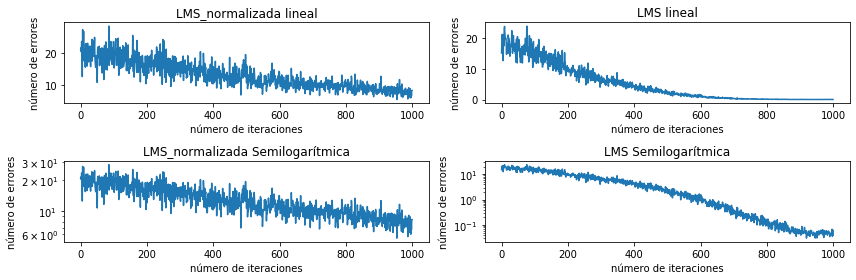

In [ ]:
# Graficamos el n√∫mero de errores en cada iteraci√≥n (La<Ld)
def LMS_normalizada(La, Ld, n_iter, var, nu, n_prome, eps):
    lista_actualizaciones = []
    lista_medias = []
    promedio = []
    lista_errores = []
    h_d = 0.1 * np.random.randn(Ld)
    for a in range (n_prome):
        salida = [] # para quedarnos con las √∫ltimas iteraciones
        h_a = np.random.randn(La)
        ruido = np.random.normal(loc = 0, scale = np.sqrt(var), size = n_iter)       
        if La == Ld: 
            Xd  = np.random.normal(loc = 0, scale = 1, size = n_iter + max(Ld,La)-1)
            Xa  = Xd    
        else: 
            if (La > Ld):
                Xa = np.random.normal(loc = 0, scale = 1, size = n_iter + La-1)
                Xd = Xa[La-Ld:]
            else:
                Xd = np.random.normal(loc = 0, scale = 1, size = n_iter + Ld-1)
                Xa = Xd[Ld-La:]           

        for i in range (n_iter):           
            # Salida sistema adaptativo
            ya = np.dot(h_a, np.flip(Xa[i:La+i]))
            # Salida sistema desconocido 
            yd = np.dot(h_d, np.flip(Xd[i:Ld+i])) + ruido[i]
            # Calculamos el error
            error = (yd-ya)
            # Guardamos el error
            salida.append((error)**2)
            # Actualizar los coeficientes del filtro
            Xa_ = np.flip(Xa[i:La + i])
            nu2 = nu / (np.linalg.norm(Xa_)**2 + eps)
            h_a = h_a + nu2 * error * Xa_
        # Guardamos las actualizaciones
        lista_actualizaciones.append(h_a)
        promedio.append(salida)
    # Media del ha promedio, para dar una estimaci√≥n m√°s robusta de los 
    # coeficientes del filtro deconocido
    media = np.mean(lista_actualizaciones, axis= 0)
    lista_errores = np.mean(np.array(promedio),axis=0)
    return media, h_d, lista_errores
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
# Graficamos el n√∫mero de errores en cada iteraci√≥n
media, h_d, lista_errores = LMS_normalizada(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100, eps = 10e-5)
axes[0,0].plot(lista_errores)
axes[0,0].set_title("LMS_normalizada lineal")
axes[0,0].set_ylabel("n√∫mero de errores")
axes[0,0].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,0].semilogy(lista_errores)
axes[1,0].set_title("LMS_normalizada Semilogar√≠tmica")
axes[1,0].set_ylabel("n√∫mero de errores")
axes[1,0].set_xlabel("n√∫mero de iteraciones")

# Graficamos el n√∫mero de errores en cada iteraci√≥n
media, h_d, lista_errores = LMS(La = 20, Ld = 20, n_iter = 1000, var = 0.01, nu = 0.01, n_prome = 100)
axes[0,1].plot(lista_errores)
axes[0,1].set_title("LMS lineal")
axes[0,1].set_ylabel("n√∫mero de errores")
axes[0,1].set_xlabel("n√∫mero de iteraciones")
# Escala semilogaritmica
axes[1,1].semilogy(lista_errores)
axes[1,1].set_title("LMS Semilogar√≠tmica")
axes[1,1].set_ylabel("n√∫mero de errores")
axes[1,1].set_xlabel("n√∫mero de iteraciones")


plt.tight_layout()
plt.show()

### Respuesta

Como podemos ver, el LMS normalizado permite la convergencia en menos iteraciones frente a LMS b√°sico logrando errores similares en estado estacionario.

#### 2 Cancelador activo de ruido. Aplicaci√≥n al ECG fetal.   
La estructura de un cancelador activo de ruido viene dada por el siguiente esquema:   

![image.png](attachment:image.png)

Un ejemplo cl√°sico de esta estructura es la obtenci√≥n del electrocardiograma fetal teniendo como principal interferencia el electrocardiograma materno. El problema es que estas dos se√±ales tienen un contenido espectral similar por lo que intentar un filtrado selectivo en frecuencia supone distorsionar la se√±al de inter√©s; en este caso el electrocardiograma fetal. Como soluci√≥n se plantea un cancelador activo de ruido donde la se√±al deseada es la se√±al que se obtiene del abdomen de la madre (tiene componentes maternos y fetales) y la se√±al de entrada al filtro adaptativo es la se√±al que se obtiene del sensor que se le coloca en el pecho a la madre; este sensor tomar√≠a, en principio, solo componente materna. El sistema adaptativo modelizar√≠a la componente materna que se encuentra en el sensor que se coloca en el abdomen de la madre de tal forma que la se√±al de error resultante s√≥lo tendr√≠a componente fetal. La siguiente figura es un esquema del dispositivo experimental planteado.

El fichero fetal_lms.mat contiene dos se√±ales; la tor√°cica y la abdominal; la tor√°cica ser√° la entrada al filtro adaptativo y la abdominal es la que contiene las dos componentes (fetal y materna interferente). Determina:   

![image.png](attachment:image.png)

a) La visualizaci√≥n de ambas se√±ales.   

In [ ]:
annots = loadmat('fetal_lms.mat')
# Entrada al filtro adaptativo
torac = annots['torac']
# Contiene las dos componentes (fetal y materna interferente)
abdom = annots['abdom']

Text(0.5, 1.0, 'Se√±al abdominal')

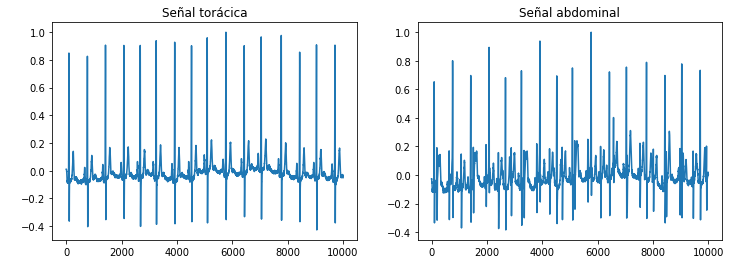

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# TORAC annots['torac']
Xa = torac[0]
# Graficamos la primera se√±al
axes[0].plot(Xa)
axes[0].set_title(" ")
axes[0].set_ylabel(" ")
axes[0].set_title("Se√±al tor√°cica")

# ABDOMINAL annots['abdom']
Xb = abdom[0]
# Graficamos el n√∫mero de errores en cada iteraci√≥n
axes[1].plot(Xb)
axes[1].set_title(" ")
axes[1].set_ylabel(" ")
axes[1].set_title("Se√±al abdominal")

b) Implementa el algoritmo LMS en esta aplicaci√≥n (puedes usar el c√≥digo del punto anterior cambiando las se√±ales de entrada al filtro y la se√±al deseada); var√≠a la longitud del filtro y la constante de adaptaci√≥n.   

In [ ]:
def LMS(Xa, La, Ld, n_iter, var, nu, n_prome):
    # lista_actualizaciones = []
    # lista_medias = []
    X_n = np.random.normal(loc =0, scale= 1, size = La)
    X_n = np.append(X_n, Xa)
    output = []
    promedio =[]
    for a in range (n_prome):
        # lista_errores = []
        salida = []
        h_a = np.random.randn(La)
        ruido = np.random.normal(loc = 0, scale = np.sqrt(var), size = n_iter)
        
        # if La == Ld:
            #Xd  = np.random.normal(loc = 0, scale = 1, size = n_iter + max(Ld,La)-1)
            #Xa  = Xd
        #else:
            #if (La > Ld):
                #Xa = np.random.normal(loc = 0, scale = 1, size = n_iter + La-1)
                #Xd = Xa[La-Ld:]
            #else:
                #Xd = np.random.normal(loc = 0, scale = 1, size = n_iter + Ld-1)
                #Xa = Xd[Ld-La:]    
        
        for i in range (n_iter):
            
            # Salida sistema adaptativo
            ya = np.dot(h_a, np.flip(X_n[i:La+i])) + ruido[i]
            # Salida sistema desconocido 
            # yd = np.dot(h_d, np.flip(Xd[i:Ld+i])) 
            # Calculamos el error
            # error = (abdominal-ya)
            # Guardamos el error
            # lista_errores.append((error)**2)
            # Actualizar los coeficientes del filtro
            # h_a = h_a + nu * error * np.flip(Xa[i:La+i])
            # Guardamos las actualizaciones
            # lista_actualizaciones.append(h_a)
            salida.append(ya)
        promedio.append(salida)
    output = np.mean(np.array(salida),axis = 0)
        # Media del ha promedio, para dar una estimaci√≥n m√°s robusta de los 
        # coeficientes del filtro deconocido
        # media = np.mean(lista_actualizaciones, axis= 0)
    
    return output    

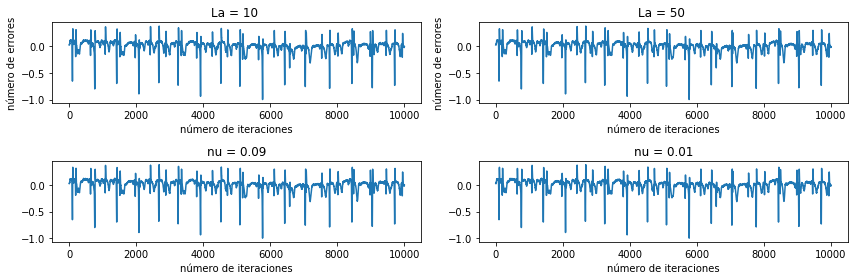

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))

# Longitud del filtro 
output = LMS(Xa = Xa, La = 10, Ld = 20, n_iter = 10000, var = 0.01, nu = 0.01, n_prome = 100)

fetal = Xa* output - Xb
axes[0,0].plot(fetal)
axes[0,0].set_title("La = 10 ")
axes[0,0].set_ylabel("n√∫mero de errores")
axes[0,0].set_xlabel("n√∫mero de iteraciones")
output = LMS(Xa = Xa, La = 50, Ld = 20, n_iter = 10000, var = 0.01, nu = 0.01, n_prome = 100)
fetal = Xa* output - Xb
axes[0,1].plot(fetal)
axes[0,1].set_title("La = 50 ")
axes[0,1].set_ylabel("n√∫mero de errores")
axes[0,1].set_xlabel("n√∫mero de iteraciones")

# La constante de adaptaci√≥n
output = LMS(Xa = Xa, La = 20, Ld = 20, n_iter = 10000, var = 0.01, nu = 0.09, n_prome = 100)
fetal = Xa* output - Xb
axes[1,0].plot(fetal)
axes[1,0].set_title("nu = 0.09")
axes[1,0].set_xlabel("n√∫mero de iteraciones")

output = LMS(Xa = Xa, La = 20, Ld = 20, n_iter = 10000, var = 0.01, nu = 0.01, n_prome = 100)
fetal = Xa* output - Xb
axes[1,1].plot(fetal)
axes[1,1].set_title("nu = 0.01")
axes[1,1].set_xlabel("n√∫mero de iteraciones")

plt.tight_layout()
plt.show()

### Respuesta

Vemos que cuando La toma valores bajos, la se√±al fetal se diferencia con dificultad, mientras que cuando le damos valores m√°s altos tiene picos diferenciados que toman valores cercanos a 1. En cuando a la constante nu, si toma valores altos, la se√±al fetal se dispara a valores positivos (en este caso cercanos a 3), y si toma valores bajos, la se√±al es negativa (en este caso cercanos a -3).

c) Superp√≥n las gr√°ficas de la se√±al tor√°cica, la abdominal y la fetal estimada, que corresponde al error $e[n]$. Ten cuidado de alinear las gr√°ficas en el instante temporal correcto ¬øQu√© ocurre con el complejo QRS (los picos de mayor amplitud) de la madre en la se√±al de salida? Haz zoom sobre alg√∫n periodo para apreciar mejor el resultado.

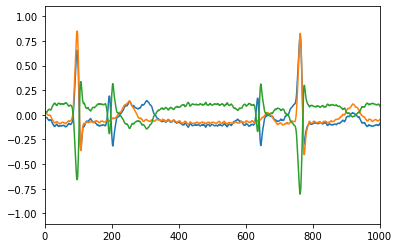

In [ ]:
output = LMS(Xa = Xa, La = 20, Ld = 20, n_iter = 10000, var = 0.01, nu = 0.01, n_prome = 100)
fetal = Xa * output - Xb

plt.plot(abdom[0])
plt.plot(torac[0])
plt.plot(fetal)
plt.xlim(0,1000)
plt.show()

### Respuesta

Lo que ocurre es que los picos de la se√±al de la madre se suavizan, y los picos de la se√±al del feto se exageran. Esto hace que podamos diferenciar abmas se√±ales gracias al filtro.